# Graph Theory: Simple and Shortest Paths - Lab

## Introduction



## Objectives
You will be able to:
* Understand and explain simple paths and shortest paths
* Calculate simple and shortest paths for undirected, directed and weighted graphs
* Explain Dijkstra Algorithm and calculate the shortest path using this algorithm in networkx
* Code Dijkstra's Algorithm from scratch
* Customize network visualizations

## Importing Packages

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

## Regenerating the [Small World] Network

To start, here's the network from the previous lesson:

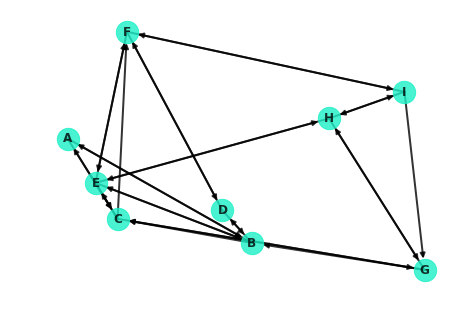

In [36]:
G = nx.navigable_small_world_graph(3, seed=3)
G = nx.relabel_nodes(G, dict(zip(G.nodes, ["A", "B", "C", "D", "E", "F", "G", "H", "I"])))
nx.draw(G, pos=nx.random_layout(G, seed=9), with_labels=True, node_color="#1cf0c7",
        node_size=500, font_weight="bold", width=2, alpha=.8)

## Dijkstra's Algorithm

As a helpful reference, here's the description of Dijkstra's Algorithm from the previous lesson:


Dijkstra's algorithm is essentially a depth based search. It commences at the starting node, spanning out to neighboring nodes and in turn visiting their neighbors in search of the destination. More formally, here's a general pseudocode outline for the algorithm:

1. Mark all nodes as unvisited
2. Set the distance of the starting node as 0, and $\infty$ for all other nodes
3. Set the starting node as the current node
4. Visit each of the neighbors of the current node
    1. For each neighbor, calculate the distance to that node traveling through the current node
    2. If this distance is less then the current distance recorded for that node, update the record accordingly
5. Mark the current node as "visited"
6. Of the unvisited nodes, set the one with the smallest distance to the current node
7. Repeat steps 4 through 6 until one of the following:
    1. The algorithm terminates when the destination node is the current node
    2. Alternatively, if the the smallest distance of the unvisited nodes is $\infty$, then no path exists to the destination node. 

> Note: Dijkstra's algorithm (and NetworkX's implementations demonstrated above) returns a single path. In many cases, there may be multiple paths which are tied for the shortest distance between two nodes. In such cases, it is arbitrary which path is returned.

## Coding Dijkstra's Algorithm Part 1

Implement a function to perform Dijkstra's algorithm. The function should take in three parameters: the graph G, the starting node u, and the destination node v. From there, return the minimum distance between nodes u and v. In the case that there is no path connecting u and v, printout an appropriate notification and return a null value.

In [90]:
def dijkstra(G, u, v, return_plots=False):
    #Your code here
    """G is the graph in question.
    u is the starting node
    v is the destination node
    
    Future: add weighting option
    """
    visited = set()
    unvisited = set(G.nodes)
    distances = {u:0}
    for node in unvisited:
        if node == u:
            continue
        else:
            distances[node] = np.inf
    cur_node = u
    weight = 1 #set default weight for non-weighted graphs
    while len(unvisited)>0:
        if cur_node == v:
            break
        if min([distances[node] for node in unvisited]) == np.inf:
            print("There is no path between u and v.")
            return np.nan
        #Pull up neighbors
        neighbors = G[cur_node]
        for node in neighbors:
            #Future update:Add weight update for weighted graphs
            #Set either the distance through the current node or a previous shorter path
            distances[node] = min(distances[cur_node] + weight, distances[node])
        #Mark current node as visited
        visited.add(cur_node)
        unvisited.remove(cur_node)
        cur_node = sorted([(node, distances[node]) for node in unvisited], key=lambda x:x[1])[0][0] #Set the node with the minimum distance as the current node
    return distances[v]

## Creating a Visual

In [ ]:
#Plot the network
#Color "wandered_paths" to visited nodes (ala wikipedia; red)
#Color "exploring_paths" from the current node to neighboring nodes (ala wikipedia; blue)

def dijkstra(G, u, v, return_plots=False):
    """G is the graph in question.
    u is the starting node
    v is the destination node
    
    Future: add weighting option
    """
    visited = set()
    unvisited = set(G.nodes)
    distances = {u:0}
    for node in unvisited:
        if node == u:
            continue
        else:
            distances[node] = np.inf
    cur_node = u
    weight = 1 #set default weight for non-weighted graphs
    #Plot Graph
    nx.draw(G, pos=nx.random_layout(G, seed=9), with_labels=True, node_color="#1cf0c7",
        node_size=500, font_weight="bold", width=2, alpha=.8)
    plt.
    while len(unvisited)>0:
        if cur_node == v:
            break
        if min([distances[node] for node in unvisited]) == np.inf:
            print("There is no path between u and v.")
            return np.nan
        #Pull up neighbors
        neighbors = G[cur_node]
        for node in neighbors:
            #Future update:Add weight update for weighted graphs
            #Set either the distance through the current node or a previous shorter path
            distances[node] = min(distances[cur_node] + weight, distances[node])
        #Mark current node as visited
        visited.add(cur_node)
        unvisited.remove(cur_node)
        cur_node = sorted([(node, distances[node]) for node in unvisited], key=lambda x:x[1])[0][0] #Set the node with the minimum distance as the current node
    return distances[v]

## Summary 
